In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [1]:
import pandas as pd
import csv as csv
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
#trainデータ読み込み
train_df = pd.read_csv("../input/train.csv", header=0)

In [3]:
#trainデータの特徴量スライス
ID = train_df.iloc[:, 0]
X = train_df.iloc[:, 1:79]
y = train_df.iloc[:, 80]
list = X.iloc[:,:].columns

#hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
#ohe-hot-encodingのカラム設定
ohe_cols = []
for i in range(len(X.columns)):
    if X.iloc[:, i].dtypes == "object":
        ohe_cols.append(list[i])

In [7]:
#one-hot encoding
X_train_ohe = pd.get_dummies(X_train, dummy_na=True, columns=ohe_cols)

In [8]:
#imputer
imp = Imputer(missing_values="NaN", strategy="mean", axis=0)
imp.fit(X_train_ohe)
X_train_ohe = pd.DataFrame(imp.transform(X_train_ohe), columns=X_train_ohe.columns.values)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
#RFECV
selector = RFECV(estimator=RandomForestClassifier(random_state=0), step=0.05)
selector.fit(X_train_ohe, y_train)
X_train_selected = selector.transform(X_train_ohe)
X_train_selected = pd.DataFrame(X_train_selected, columns=X_train_ohe.columns.values[selector.support_])

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=2, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Best score: 0.8564503316090337
Best param: {'est__max_depth': 5, 'est__n_estimators': 150}
scorer: <function _passthrough_scorer at 0x7f79e6280a60>


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__max_depth,param_est__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,1.305671,0.015600,0.002319,0.000035,5,150,"{'est__max_depth': 5, 'est__n_estimators': 150}",0.837236,0.921960,0.585033,0.893795,0.895797,0.873288,0.877759,0.881507,0.918112,0.881377,0.856450,0.093490,1
4,0.977042,0.016527,0.002191,0.000047,5,100,"{'est__max_depth': 5, 'est__n_estimators': 100}",0.837022,0.920965,0.585446,0.893170,0.893740,0.872210,0.875105,0.880079,0.914539,0.881238,0.855218,0.092841,2
3,0.575007,0.007145,0.002030,0.000073,5,50,"{'est__max_depth': 5, 'est__n_estimators': 50}",0.834809,0.915323,0.585486,0.891233,0.891181,0.864804,0.867979,0.881339,0.909554,0.884155,0.852454,0.091851,3
2,0.908736,0.019594,0.002266,0.000129,4,150,"{'est__max_depth': 4, 'est__n_estimators': 150}",0.857962,0.914024,0.469679,0.895908,0.904105,0.913937,0.869912,0.878523,0.913544,0.886415,0.850209,0.128513,4
1,0.650805,0.009045,0.002006,0.000056,4,100,"{'est__max_depth': 4, 'est__n_estimators': 100}",0.856897,0.911501,0.468002,0.896240,0.902215,0.912016,0.872295,0.877320,0.911178,0.885494,0.849122,0.128593,5
8,1.778481,0.028575,0.002609,0.000137,6,150,"{'est__max_depth': 6, 'est__n_estimators': 150}",0.848711,0.916621,0.556351,0.866678,0.881605,0.896812,0.847593,0.871877,0.892528,0.887871,0.846516,0.099064,6
7,1.277332,0.022213,0.002335,0.000087,6,100,"{'est__max_depth': 6, 'est__n_estimators': 100}",0.848013,0.916139,0.556388,0.866993,0.881196,0.896614,0.846381,0.872880,0.891836,0.887108,0.846206,0.098962,7
0,0.387808,0.005425,0.001853,0.000036,4,50,"{'est__max_depth': 4, 'est__n_estimators': 50}",0.855956,0.901923,0.487068,0.893963,0.896153,0.902595,0.865495,0.865993,0.902150,0.891548,0.846105,0.121106,8
6,0.756428,0.004350,0.002031,0.000046,6,50,"{'est__max_depth': 6, 'est__n_estimators': 50}",0.847567,0.914294,0.561238,0.866871,0.879097,0.894085,0.845544,0.872947,0.886555,0.885996,0.845275,0.096920,9


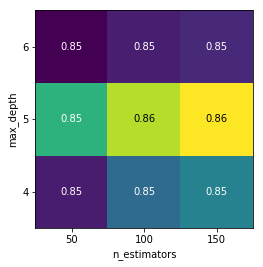

In [14]:
#評価①　アルゴリズム別詳細

#アルゴリズム準備
pipe_rf = Pipeline([('scl', StandardScaler()), ('est', RandomForestRegressor(random_state=2))])      
pipe_gb = Pipeline([('scl', StandardScaler()), ('est', GradientBoostingRegressor(random_state=2))])
argorithm = pipe_gb

#パラメーター準備
param_grid_rf = {'est__n_estimators': [10, 50, 100], 'est__max_depth': [5, 9, 13]}
param_grid_gb = {'est__n_estimators': [50, 100, 150], 'est__max_depth': [4, 5, 6]}
params = param_grid_gb

#グリッドサーチ
grid_search = GridSearchCV(argorithm, param_grid=params, cv=10, return_train_score=False)
grid_search = grid_search.fit(X_train_selected, y_train)

#グリッドサーチ結果最適
#print('Best estimator:', grid_search.best_estimator_)
print(argorithm.named_steps['est'])
print('Best score:', grid_search.best_score_)
print('Best param:', grid_search.best_params_)
print('scorer:', grid_search.scorer_)

#モデルのランキング
results = pd.DataFrame(grid_search.cv_results_)
display(results.sort_values('rank_test_score'))

#ベストモデルで予測
# print(grid_search.predict_proba(X_train_selected))

#パラメーターの見極め
import numpy as np
import mglearn
scores = np.array(results.mean_test_score).reshape(3,3)
mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=params['est__n_estimators'], \
    ylabel='max_depth', yticklabels=params['est__max_depth'], cmap="viridis")

In [ ]:
#アルゴリズム
#RandomForestClassifier
model_name = 'rf_001'
clf = Pipeline([('scl', StandardScaler()), ('est', RandomForestRegressor(n_estimators=100, max_depth=3, random_state=2))])      

#GradientBoostingClassifier
model_name = 'gb_001'
clf = Pipeline([('scl', StandardScaler()), ('est', GradientBoostingRegressor(n_estimators=150, max_depth=5, random_state=2))])

In [ ]:
#one-hot encoding
X_test_ohe = pd.get_dummies(X_test, dummy_na=True, columns=ohe_cols)

#列合わせ(①modelデータにしかないものは0を挿入 ②testデータにしかないものは削除)
X_train_ohe_columns = pd.DataFrame(None, columns=X_train_ohe.columns.values, dtype=float)
X_test_exp = pd.concat([X_train_ohe_columns, X_test_ohe])
X_test_exp.loc[:,set(X_train_ohe_columns.columns)-set(X_test_ohe.columns)] = \
    X_test_exp.loc[:,set(X_train_ohe_columns.columns)-set(X_test_ohe.columns)].fillna(0, axis=1)          #①
X_test_exp = X_test_exp.drop(set(X_test_exp.columns.values)-set(X_train_ohe_columns), axis=1)     #②

#並び替え
X_test_exp = X_test_exp.reindex_axis(X_train_ohe.columns.values, axis=1)

#imputer
X_test_exp = pd.DataFrame(imp.transform(X_test_exp), columns=X_train_ohe.columns.values)

#RFECV
X_test_selected = X_test_exp.loc[:, X_train_ohe.columns.values[selector.support_]]

In [ ]:
#モデリング
#学習
clf.fit(X_train_selected, y_train)

In [ ]:
#testデータ読み込み
test_df = pd.read_csv("../input/test.csv", header=0)

#testデータの特徴量スライス
IDs = test_df.iloc[:, 0]
X_pred = test_df.iloc[:, 1:79]

In [ ]:
#one-hot encoding
X_pred_ohe = pd.get_dummies(X_pred, dummy_na=True, columns=ohe_cols)

#列合わせ(①modelデータにしかないものは0を挿入 ②testデータにしかないものは削除)
X_train_ohe_columns = pd.DataFrame(None, columns=X_train_ohe.columns.values, dtype=float)
X_pred_exp = pd.concat([X_train_ohe_columns, X_pred_ohe])
X_pred_exp.loc[:, set(X_train_ohe_columns)-set(X_pred_ohe.columns.values)] = \
    X_pred_exp.loc[:, set(X_train_ohe_columns)-set(X_pred_ohe.columns.values)].fillna(0, axis=1)          #①
X_pred_exp = X_pred_exp.drop(set(X_pred_exp.columns.values)-set(X_train_ohe_columns), axis=1)     #②

#並び替え
X_pred_exp = X_pred_exp.reindex_axis(X_train_ohe.columns.values, axis=1)

#imputer
X_pred_exp = pd.DataFrame(imp.transform(X_pred_exp), columns=X_train_ohe.columns.values)

#RFECV
X_pred_selected = X_pred_exp.loc[:, X_train_ohe.columns.values[selector.support_]]

In [ ]:
#predict
prediction = pd.DataFrame(clf.predict(X_pred_selected), columns=set(['SalePrice']))
IDs = pd.DataFrame(IDs)
IDs.join(prediction).to_csv('house_price.csv', index=False)